In [ ]:
def get_cylinder_volume(cylinder_length, cylinder_diameter):
    cylinder_radius = cylinder_diameter / 2
    cylinder_straight_length = cylinder_length - cylinder_diameter
    return cylinder_straight_length * 3.14159 * cylinder_radius**2 + (4/3) * 3.14159 * cylinder_radius**3 #volume of cylinder + volume of two hemispheres

In [ ]:
water_volume = get_cylinder_volume(water_reservoir_length, cylinder_diameter)
water_mass = water_volume * water_density

In [59]:
import math
import matplotlib.pyplot as plt

## Determine flow rate given gravity gradient

# I need to find pressure at end given depth of water in the cylinder
def get_gravity_at_depth(depth, gravity_gradient, end_gravity):
    return end_gravity - gravity_gradient * depth

def get_discharge_velocity(water_height, gravity_gradient, end_gravity): #water height should be water remaining in tank
        #return math.sqrt(2 * end_gravity * water_height) #TODO: add gravity gradient
        return math.sqrt(2* (end_gravity * water_height - 0.5 * gravity_gradient * water_height**2))

# volume flow rate
def get_volume_flow_rate(water_height, orifice_diameter, gravity_gradient, end_gravity):
    return get_discharge_velocity(water_height, gravity_gradient, end_gravity) * 3.14159 * (orifice_diameter / 2)**2

# get time to empty - must integrate over time since flow rate is not constant
def get_time_to_empty(water_height, orifice_diameter, gravity_gradient, end_gravity, initial_water_volume, cylinder_diameter):
    lost_volume = 0
    time = 0
    dt = 0.01
    while lost_volume < initial_water_volume:
        current_water_height = (initial_water_volume - lost_volume) / (3.14159 * (cylinder_diameter / 2)**2)
        discharge_velocity = get_discharge_velocity(current_water_height, gravity_gradient, end_gravity)
        discharge_volume = discharge_velocity * 3.14159 * (orifice_diameter / 2)**2
        lost_volume += discharge_volume * dt
        plt.plot(time, current_water_height * 100, 'ro', label="Simulated Data") #graphs the volume of water remaining
        #plt.plot(time, discharge_velocity, 'bo')
        time += dt
    return time

def get_volume(height, diameter):
    return 3.14159 * (diameter / 2)**2 * height
    


15.389999999999716


Text(0, 0.5, 'Water level along length (cm)')

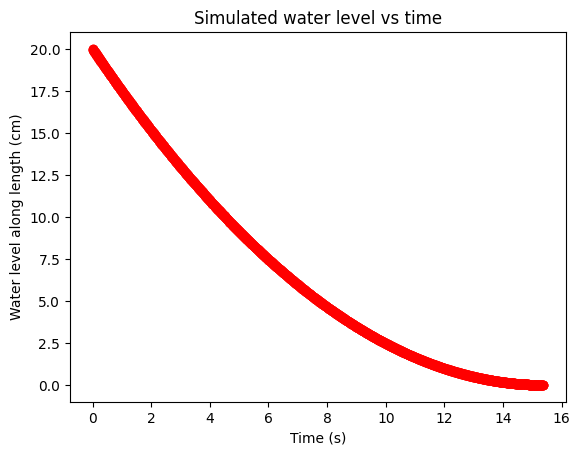

In [61]:
#Initial test: water draining from a cylinder
filled_height = 0.2 #m
orifice_diameter = 0.0065 #6.5mm
tube_inner_diameter = 0.0568 #m
water_volume = get_volume(filled_height, tube_inner_diameter)

estimated_empty_time = get_time_to_empty(filled_height, orifice_diameter, 0, 9.8, water_volume, tube_inner_diameter)
print(estimated_empty_time)

#Real data
water_level = [20, 18, 16, 14, 12, 10, 8, 6, 4, 2]

timestamps = [
    0,
    1.1,
    2.03333333333334,
    3.03333333333334,
    4.36666666666667,
    5.56666666666667,
    7.63333333333337,
    8.79999999999997,
    10.6,
    12.7333333333334
]

# plt.plot(timestamps, water_level, 'bo', label='Real data')
# plt.title('Water level vs time')
# plt.xlabel('Time (s)')
# plt.ylabel('Water level (cm)')
# plt.text(10, 15, 'Red: Real data\nBlue: Simulated data')

plt.title('Simulated water level vs time')
plt.xlabel('Time (s)')
plt.ylabel('Water level along length (cm)')

#12 seconds in trial

In [54]:
# Compute real horizontal velocity from measured water trace
arm_length = 0.44 #m - from center of rotation to orifice

horizontal_displacement = 2.74 - arm_length #m
vertical_displacement = 1.32 #m

def compute_horizontal_velocity(gravity, horizontal_displacement, vertical_displacement):
    return math.sqrt(2 * gravity * horizontal_displacement / (1 - (vertical_displacement / horizontal_displacement)**2))

real_horizontal_velocity = compute_horizontal_velocity(9.8, horizontal_displacement, vertical_displacement)
print(real_horizontal_velocity)

8.198841044631742


In [35]:
#Compute angular velocity of rotating arm
number_of_rotations = 11 - 4.5 
time_to_complete = 5.8 - 3.2

angular_velocity = number_of_rotations * 2 * 3.14159 / time_to_complete #rad/s

tube_length = 0.23 #m

def get_gravity_at_point(angular_velocity, rotation_radius):
    return angular_velocity**2 * rotation_radius

end_gravity = get_gravity_at_point(angular_velocity, arm_length)
gravity_gradient = (end_gravity - get_gravity_at_point(angular_velocity, arm_length - tube_length)) / tube_length
water_volume = 3.141 * (tube_inner_diameter / 2)**2 * tube_length * 0.75 #m^3 - 75% full



In [36]:
#Compute theoretical exit velocity of water

discharge_velocity = get_discharge_velocity(tube_length, gravity_gradient, end_gravity) #discharge when tube is full (should be higher than actual)
print(discharge_velocity)

#TODO: this is much higher than the actual velcoity - need to figure out why

6.073514973536638


6.729999999999901


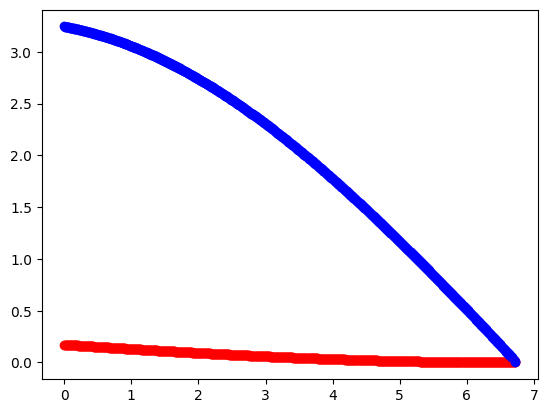

In [38]:
time = get_time_to_empty(tube_length, orifice_diameter, gravity_gradient, get_gravity_at_point(angular_velocity, arm_length - tube_length), water_volume, tube_inner_diameter)
print(time)

#6.2 seconds actual

Text(0, 0.5, 'Position (revolutions)')

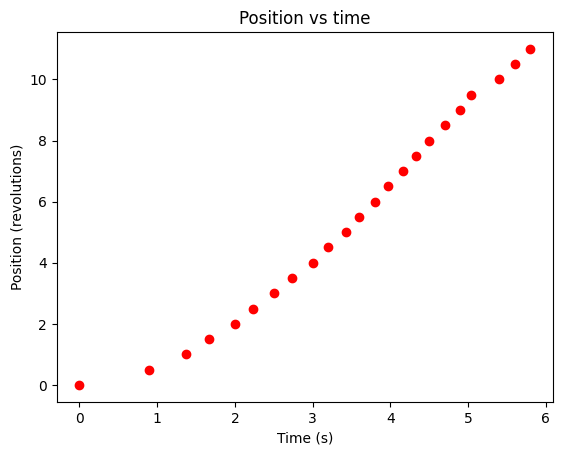

In [53]:
#Plot angular velcoity vs time
time = [
    0, 0.9, 1.36666666666667, 1.66666666666667, 2, 2.23333333333333, 2.5, 
    2.73333333333333, 3, 3.2, 3.43333333333333, 3.6, 3.8, 3.96666666666667, 
    4.16666666666667, 4.33333333333333, 4.5, 4.7, 4.9, 5.03333333333333, 
    5.4, 5.6, 5.8
]

position = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10, 10.5, 11]

plt.plot(time, position, 'ro')
plt.title('Position vs time')
plt.xlabel('Time (s)')
plt.ylabel('Position (revolutions)')

#convert



In [ ]:
#Solution

#Problem variables
cylinder_length = 50 #m
cylinder_diameter = 3 #m
tank_length = 10 #m

water_density = 1000 #kg/m^3
air_density = 1.2 #kg/m^3
